# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Vivi Kurniawati
- **Email:** vikur99@gmail.com
- **ID Dicoding:** vivi_kurniawati

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
2. Apa hari dalam seminggu dengan jumlah penyewaan tertinggi dan terendah?
3. Bagaimana perubahan pola penyewaan sepeda antara musim panas dan musim dingin?
4. Apakah terdapat tren peningkatan atau penurunan jumlah penyewaan sepeda selama dua tahun tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [3]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Berikut adalah penjelasan sederhana dari dataset penyewaan sepeda:

- instant: indeks pencatatan
- dteday: tanggal
- season: musim
  - 1: musim semi
  - 2: musim panas
  - 3: musim gugur
  - 4: musim dingin
- yr: tahun
  - 0: 2011
  - 1: 2012
- mnth: bulan (1 hingga 12)
- hr: jam (0 hingga 23)
- holiday: apakah hari tersebut hari libur
- weekday: hari dalam seminggu
- workingday: apakah hari tersebut hari kerja
  - 1: hari kerja (bukan akhir pekan atau hari libur)
  - 0: bukan hari kerja (akhir pekan atau hari libur)
- weathersit: kondisi cuaca
  - 1: Cerah, sedikit berawan, sebagian berawan
  - 2: Kabut + berawan, kabut + mendung sebagian
  - 3: Hujan ringan, salju ringan, badai dengan awan berserakan
  - 4: Hujan deras + hujan es + badai + kabut, salju + kabut
- temp: suhu (dalam Celsius) yang dinormalisasi; nilai dibagi dengan 41 (suhu maksimum)
- atemp: suhu terasa (dalam Celsius) yang dinormalisasi; nilai dibagi dengan 50 (suhu maksimum)
- hum: kelembaban yang dinormalisasi; nilai dibagi dengan 100 (maksimum)
- windspeed: kecepatan angin yang dinormalisasi; nilai dibagi dengan 67 (maksimum)
- casual: jumlah pengguna sepeda yang tidak terdaftar
- registered: jumlah pengguna sepeda yang terdaftar
- cnt: total jumlah penyewaan sepeda, termasuk pengguna tidak terdaftar dan terdaftar

### Assessing Data

In [4]:
# Check for data types, missing values, Descriptive statistics for numeric columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

- Jumlah dan Kelengkapan Data: Terdapat 17.379 baris dan 17 kolom, semuanya lengkap tanpa data hilang.
- Jenis Data: Mayoritas kolom bertipe integer dan float, kecuali dteday yang berupa string (perlu konversi ke datetime).
- Distribusi Data Utama:
  - season: Nilai rata-rata di sekitar 2.5 menunjukkan bahwa data mewakili musim yang beragam dari musim semi hingga musim dingin (1 hingga 4).
  - yr: Dataset ini mencakup dua tahun, 2011 dan 2012, dengan rata-rata mendekati 0.5, yang menunjukkan distribusi yang merata antar tahun.
  - hr: Data mencakup waktu dari pukul 0 hingga 23, dengan rata-rata sekitar 11.5, menunjukkan adanya aktivitas penyewaan sepanjang hari.
  - weathersit: Rata-rata kondisi cuaca berada di sekitar 1.4, yang menandakan sebagian besar penyewaan terjadi saat cuaca baik atau sedikit mendung.
  - temp, atemp, hum, dan windspeed: Semua variabel cuaca dinormalisasi, sehingga perlu diperhatikan dalam interpretasi data.
  - cnt (total penyewaan):
    - Penyewaan bervariasi dari 1 hingga 977 per jam.
    - Rata-rata penyewaan sekitar 189, menunjukkan permintaan yang cukup stabil, dengan beberapa periode puncak.
- Pengguna Sepeda:
  - casual dan registered: Rata-rata pengguna tidak terdaftar (casual) adalah 35.68, sedangkan pengguna terdaftar (registered) sekitar 153.78, menunjukkan sebagian besar penyewaan dilakukan oleh pengguna terdaftar.

### Cleaning Data

In [5]:
# Konversi kolom `dteday` dari string ke datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Rename columns untuk membuatnya lebih deskriptif
df.rename(columns={
    'instant': 'record_index',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'weekday',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition',
    'temp': 'temp_normalized',
    'atemp': 'atemp_normalized',
    'hum': 'humidity_normalized',
    'windspeed': 'windspeed_normalized',
    'casual': 'casual_count',
    'registered': 'registered_count',
    'cnt': 'total_count'
}, inplace=True)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

# Drop duplicates if any
if duplicates > 0:
    df.drop_duplicates(inplace=True)

# Check for any missing values
missing_values = df.isnull().sum()
print(f"Jumlah data hilang per kolom:\n{missing_values}")

Jumlah data duplikat: 0
Jumlah data hilang per kolom:
record_index            0
date                    0
season                  0
year                    0
month                   0
hour                    0
is_holiday              0
weekday                 0
is_workingday           0
weather_condition       0
temp_normalized         0
atemp_normalized        0
humidity_normalized     0
windspeed_normalized    0
casual_count            0
registered_count        0
total_count             0
dtype: int64


**Insight:**
- Semua data lengkap tanpa missing values
- Kolom dteday telah dikonversi ke format datetime untuk analisis berbasis tanggal.
- Nama kolom diubah agar lebih deskriptif, memudahkan pemahaman.
- Tidak ada duplikat yang perlu dihapus dalam data ini.

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung rata-rata jumlah penyewaan
weather_effect = df.groupby('weather_condition')['total_count'].mean()
print("Pengaruh Cuaca terhadap Jumlah Penyewaan:")
print(weather_effect)

Pengaruh Cuaca terhadap Jumlah Penyewaan:
weather_condition
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: total_count, dtype: float64


**Insight:**
- Cuaca Cerah/Berawan (Kategori 1): Rata-rata penyewaan 204.87
- Cuaca Berkabut/Mendung (Kategori 2): Rata-rata penyewaan 175.17
- Hujan ringan/Salju ringan (Kategori 3): Rata-rata penyewaan 111.58
- Cuaca Ekstrem (Kategori 4): Rata-rata penyewaan 74.33

Kesimpulan: Semakin buruk kondisi cuaca, semakin rendah rata-rata penyewaan sepeda. Cuaca cerah memiliki penyewaan tertinggi, sedangkan cuaca ekstrem memiliki penyewaan terendah.

In [7]:
# Menghitung jumlah penyewaan berdasarkan hari dalam seminggu
rentals_by_weekday = df.groupby('weekday')['total_count'].sum().sort_values()
print("Hari dengan Penyewaan Terendah hingga Tertinggi:")
print(rentals_by_weekday)

Hari dengan Penyewaan Terendah hingga Tertinggi:
weekday
0    444027
1    455503
2    469109
3    473048
6    477807
4    485395
5    487790
Name: total_count, dtype: int64


**Insight:**

Data ini menunjukkan total penyewaan sepeda berdasarkan hari dalam seminggu, dari yang terendah hingga tertinggi:
- Minggu (0): 444,027 penyewaan (terendah)
- Senin (1): 455,503 penyewaan
- Selasa (2): 469,109 penyewaan
- Rabu (3): 473,048 penyewaan
- Sabtu (6): 477,807 penyewaan
- Kamis (4): 485,395 penyewaan
- Jumat (5): 487,790 penyewaan (tertinggi)

Kesimpulan: Penyewaan sepeda cenderung lebih rendah pada hari Minggu dan lebih tinggi menjelang akhir pekan (Jumat).

In [20]:
# Filter data musim panas dan musim dingin
summer_data = df[df['season'] == 2]
winter_data = df[df['season'] == 4]

# Menghitung rata-rata penyewaan berdasarkan jam untuk musim panas dan musim dingin
summer_pattern = summer_data.groupby('hour')['total_count'].mean()
winter_pattern = winter_data.groupby('hour')['total_count'].mean()

# Menampilkan rata-rata penyewaan per jam
print("Rata-rata Penyewaan per Jam untuk Musim Panas:")
print(summer_pattern)
print("\nRata-rata Penyewaan per Jam untuk Musim Dingin:")
print(winter_pattern)

Rata-rata Penyewaan per Jam untuk Musim Panas:
hour
0      56.842391
1      35.222826
2      23.380435
3      11.450549
4       6.211111
5      19.169399
6      79.070652
7     221.483696
8     380.135870
9     233.983696
10    189.777174
11    231.440217
12    278.543478
13    282.728261
14    265.777174
15    279.250000
16    346.907609
17    518.847826
18    483.173913
19    358.663043
20    256.983696
21    191.554348
22    146.114130
23     95.983696
Name: total_count, dtype: float64

Rata-rata Penyewaan per Jam untuk Musim Dingin:
hour
0      56.333333
1      35.920455
2      23.765714
3      11.861272
4       7.267045
5      22.590909
6      81.681818
7     231.607955
8     396.346591
9     239.443182
10    187.465909
11    226.369318
12    281.664773
13    277.209040
14    266.011299
15    279.819209
16    346.903955
17    486.158192
18    426.146893
19    297.033898
20    212.141243
21    161.327684
22    123.564972
23     86.440678
Name: total_count, dtype: float64


**Insight:**

Berikut perbedaan pola penyewaan sepeda antara musim panas dan musim dingin berdasarkan jam:
- Musim Panas:
  Penyewaan tertinggi terjadi pada jam 17.00 dengan rata-rata 518 penyewaan.
  Jam sibuk lainnya adalah sekitar jam 8 pagi dan sore (18-19), dengan jumlah penyewaan tinggi sepanjang siang hari.
- Musim Dingin:
  Puncak penyewaan juga sekitar jam 17.00, tetapi lebih rendah, dengan rata-rata 486 penyewaan.
  Penyewaan turun lebih cepat setelah jam 18.00, menunjukkan orang berhenti bersepeda lebih awal.

Kesimpulan: Orang lebih sering menyewa sepeda di musim panas sepanjang hari, sementara di musim dingin mereka lebih banyak menyewa pada jam-jam sibuk (pagi dan sore).

In [9]:
# Mengelompokkan data per bulan selama dua tahun
monthly_trend = df.groupby(['year', 'month'])['total_count'].mean().unstack()
print("Tren Penyewaan Sepeda Selama Dua Tahun:")
print(monthly_trend)

Tren Penyewaan Sepeda Selama Dua Tahun:
month          1           2           3           4           5           6   \
year                                                                            
0       55.507267   74.291217   87.732877  131.947149  182.555108  199.322222   
1      130.558704  149.041908  221.904441  242.651811  263.259409  281.708333   

month          7           8           9          10          11          12  
year                                                                          
0      189.974462  186.991792  177.709902  166.23284  142.095967  117.844804  
1      273.665323  288.310484  303.573611  280.84887  212.623955  166.729111  


**Insight:**

Data menunjukkan tren peningkatan penyewaan sepeda dari 2011 ke 2012:
- 2011: Puncak penyewaan di bulan Mei (182), menurun di akhir tahun (Desember: 118).
- 2012: Puncak di bulan September (303), lebih tinggi di sepanjang tahun dibanding 2011.

Kesimpulan: Penyewaan lebih tinggi di musim panas dan meningkat secara keseluruhan pada 2012 dibanding 2011.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-11-ec2733adbd31>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_effect.index, y=weather_effect.values, palette="Blues")


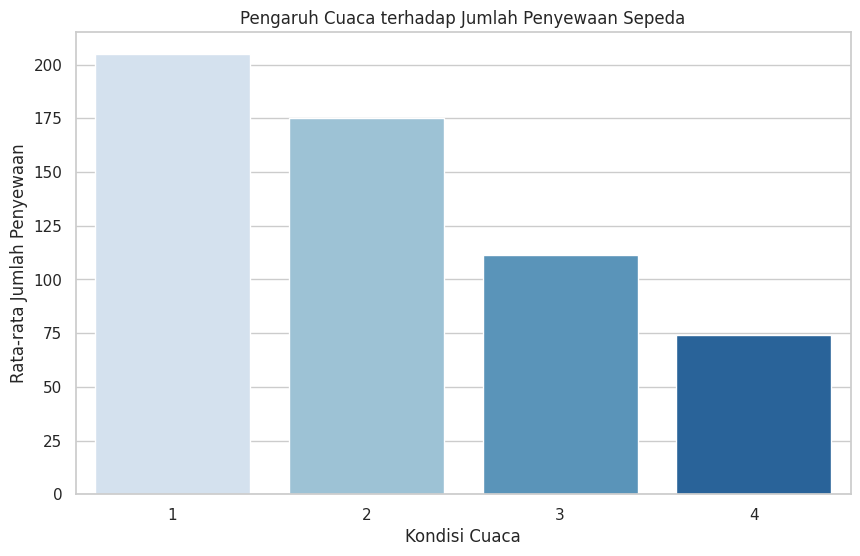

In [11]:
# Visualisasi pengaruh cuaca terhadap jumlah penyewaan
plt.figure(figsize=(10,6))
sns.barplot(x=weather_effect.index, y=weather_effect.values, palette="Blues")
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

**Insight :**

- Cerah/Berawan (Kategori 1): Penyewaan tertinggi, lebih dari 200.
- Berkabut/Mendung (Kategori 2): Penyewaan menurun.
- Hujan ringan/Salju ringan (Kategori 3): Penyewaan lebih rendah.
- Cuaca Ekstrem (Kategori 4): Penyewaan terendah, di bawah 100.

Kesimpulan: Penyewaan sepeda lebih tinggi pada cuaca cerah dan menurun saat cuaca memburuk.

### Pertanyaan 2:

<ipython-input-15-6bb7f23c00d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rentals_by_weekday.index, y=rentals_by_weekday.values, palette="viridis")


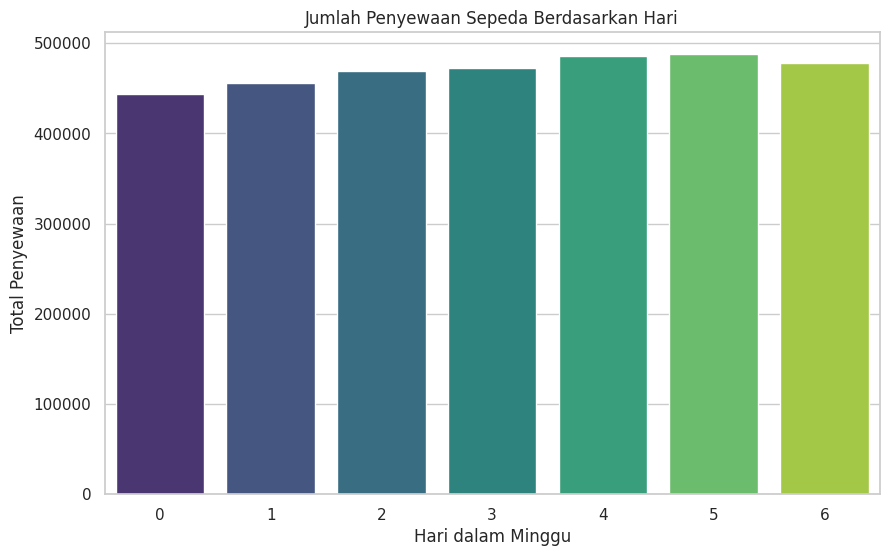

In [15]:
# Visualisasi jumlah penyewaan per hari dalam seminggu
plt.figure(figsize=(10,6))
sns.barplot(x=rentals_by_weekday.index, y=rentals_by_weekday.values, palette="viridis")
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Total Penyewaan')
plt.show()

**Insight:**
- Penyewaan sepeda cenderung paling rendah pada Minggu (0), mungkin karena orang mengurangi aktivitas bepergian pada akhir pekan.
- Penyewaan sepeda sedikit meningkat sepanjang hari kerja, dengan Jumat (5) sebagai hari dengan jumlah penyewaan tertinggi.
- Sabtu (6) menunjukkan sedikit penurunan dibanding Jumat, tetapi masih lebih tinggi dibandingkan dengan hari Minggu.

Kesimpulan: Penyewaan sepeda lebih tinggi selama hari kerja, terutama pada akhir minggu (Jumat), dan paling rendah pada hari Minggu. Hal ini mungkin terkait dengan kebiasaan bepergian untuk bekerja atau kegiatan rutin di hari kerja.

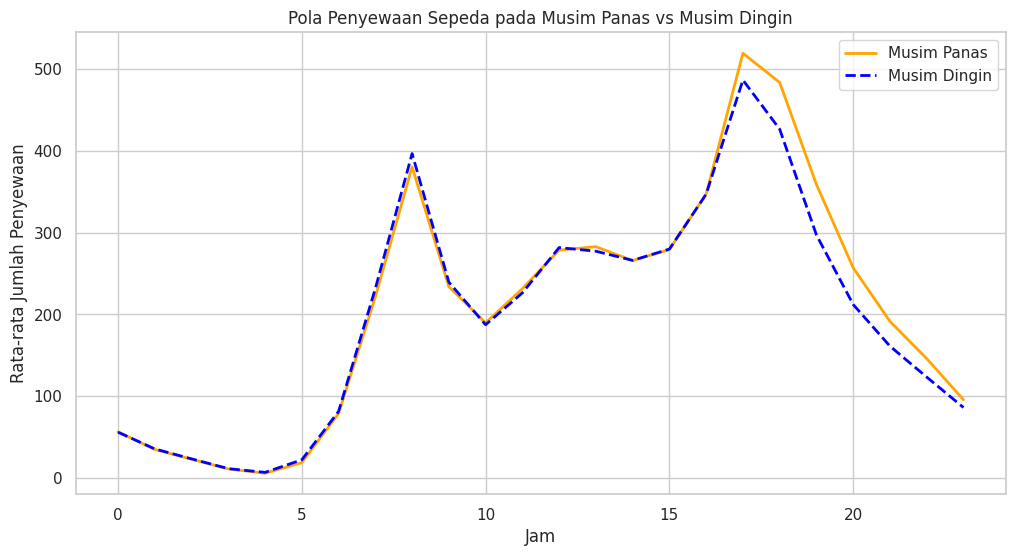

In [16]:
# Visualisasi pola penyewaan musim panas vs musim dingin
plt.figure(figsize=(12,6))
plt.plot(summer_pattern, label='Musim Panas', color='orange', linestyle='-', linewidth=2)
plt.plot(winter_pattern, label='Musim Dingin', color='blue', linestyle='--', linewidth=2)
plt.title('Pola Penyewaan Sepeda pada Musim Panas vs Musim Dingin')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.legend()
plt.show()

**Insight:**
- Puncak penyewaan terjadi dua kali: pagi (jam 8) dan sore (jam 17), menunjukkan banyak orang memakai sepeda untuk berangkat dan pulang kerja.
- Musim Panas: Penyewaan lebih tinggi di puncak pagi dan sore, dan tetap tinggi hingga malam.
- Musim Dingin: Penyewaan lebih rendah, terutama setelah jam kerja sore, menurun lebih cepat di malam hari.

Kesimpulan: Penyewaan sepeda lebih tinggi dan stabil di musim panas, sementara di musim dingin lebih cepat menurun setelah sore.

<Figure size 1200x600 with 0 Axes>

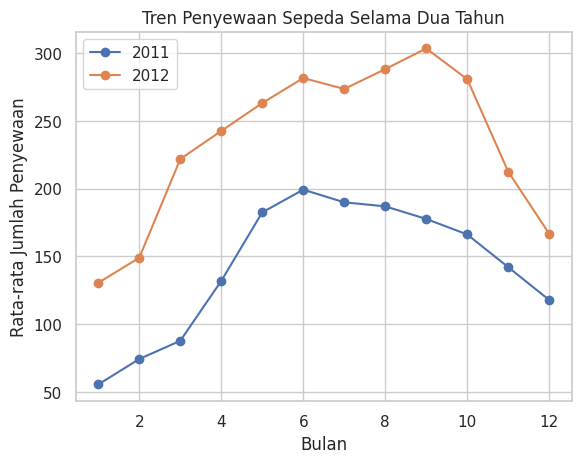

In [17]:
# Visualisasi tren penyewaan selama dua tahun
plt.figure(figsize=(12,6))
monthly_trend.T.plot(kind='line', marker='o', linestyle='-', linewidth=1.5)
plt.title('Tren Penyewaan Sepeda Selama Dua Tahun')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.legend(['2011', '2012'])
plt.show()

**Insight:**
- 2011: Penyewaan naik hingga puncaknya di bulan Juni, lalu menurun sampai akhir tahun.
- 2012: Penyewaan lebih tinggi dari 2011, puncaknya di bulan September, lalu turun di akhir tahun.

Kesimpulan: Penyewaan sepeda meningkat dari 2011 ke 2012, dengan puncak di musim panas (Juni-September).

## Analisis Lanjutan (Opsional)

## Conclusion

1. Cuaca: Penyewaan sepeda cenderung lebih tinggi saat cuaca cerah dan menurun saat cuaca buruk. Untuk mengatasi kendala ini, perusahaan bisa menyediakan fasilitas tambahan seperti jas hujan dan penutup sepeda, atau menawarkan promo khusus saat cuaca mendung namun tidak ekstrem. Hal ini bisa membuat pengguna tetap nyaman dan tertarik menyewa sepeda meskipun kondisi cuaca tidak ideal.

2. Hari Penyewaan: Jumlah penyewaan paling tinggi terjadi pada hari kerja, terutama pada hari Jumat, sedangkan hari Minggu memiliki jumlah penyewaan terendah. Untuk meningkatkan penyewaan di akhir pekan, perusahaan dapat memberikan diskon atau promo khusus di hari Sabtu dan Minggu. Dengan cara ini, pengguna yang mencari kegiatan rekreasi di akhir pekan akan lebih tertarik untuk menyewa sepeda.

3. Musim: Di musim panas, penyewaan sepeda lebih tinggi dan stabil sepanjang hari, sementara di musim dingin penyewaan cepat menurun setelah jam sore. Untuk mendorong lebih banyak penyewaan di musim dingin, perusahaan bisa menyediakan perlengkapan tambahan seperti jaket atau sarung tangan yang bisa disewa bersama sepeda. Diskon musiman juga bisa menjadi daya tarik tambahan bagi pengguna yang ingin bersepeda meski cuaca lebih dingin.

4. Tren Tahunan: Penyewaan sepeda meningkat dari 2011 ke 2012, terutama di musim panas. Untuk memaksimalkan tren ini, perusahaan dapat meningkatkan promosi selama musim panas dan menyediakan lebih banyak sepeda untuk memenuhi permintaan. Selain itu, menawarkan paket langganan tahunan dengan harga diskon juga bisa membantu menjaga tren positif ini sepanjang tahun.